In [28]:
from multiprocessing import cpu_count
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from pycebox.ice import ice, ice_plot, pdp
from pdpbox.info_plots import target_plot, actual_plot
from pdpbox.pdp import pdp_isolate, pdp_plot
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score

In [14]:
notes = pd.read_csv('../data/banknote.csv')
notes
X = notes.drop(columns=['Class'])
y = notes['Class']

Accuracy Score: 0.988160
[[614   8]
 [  5 471]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       622
          1       0.98      0.99      0.99       476

avg / total       0.99      0.99      0.99      1098



<Figure size 1080x1080 with 0 Axes>

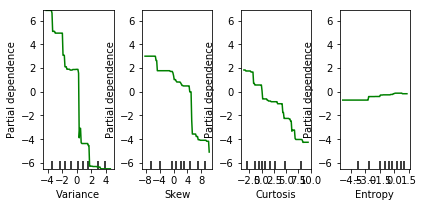

In [31]:
test_size=0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

gbc = GradientBoostingClassifier()
gbc.fit(X_train.values, y_train)
y_pred = gbc.predict(X_test.values)

print("Accuracy Score: %f" %(accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
df = X_train

features = list(range(len(df.columns)))
feature_names = df.columns

plt.figure(1, figsize=(15, 15))
f, ax = plot_partial_dependence(gbc, X_train, features=features, feature_names=feature_names, n_cols=4, n_jobs=cpu_count())

Accuracy: 1.000000
[[13  0]
 [ 0  8]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        21



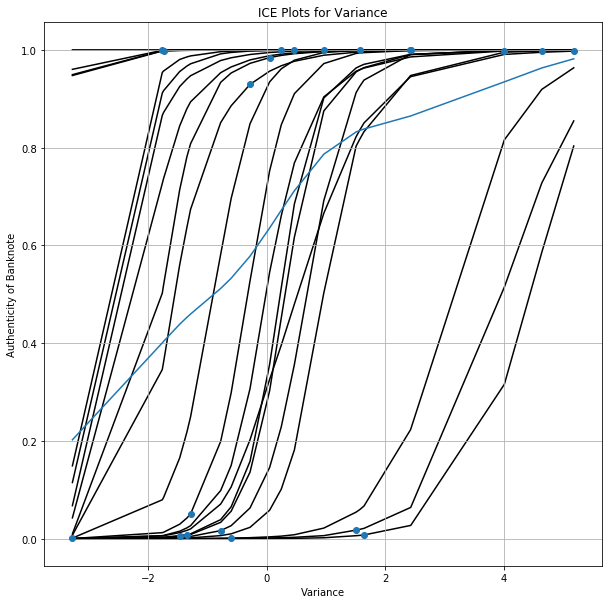

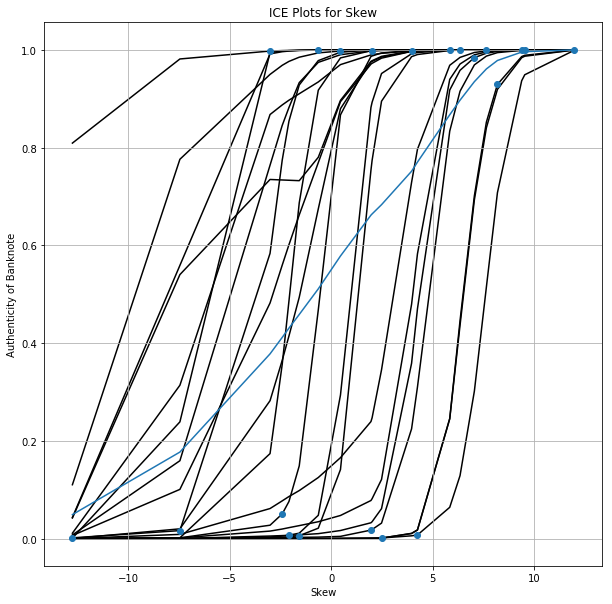

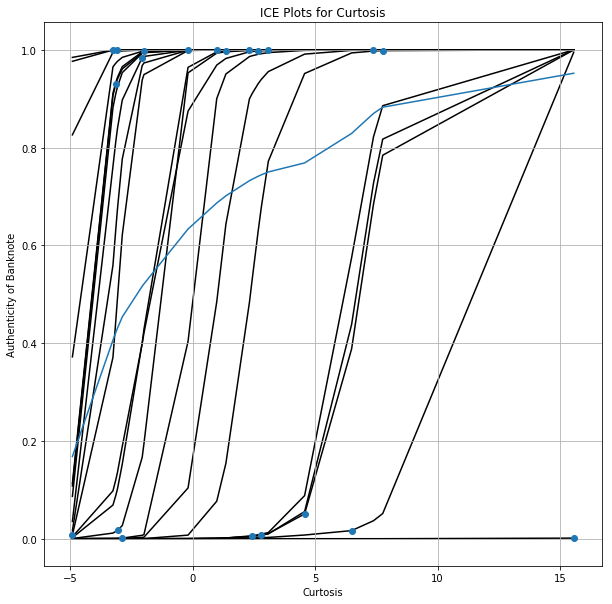

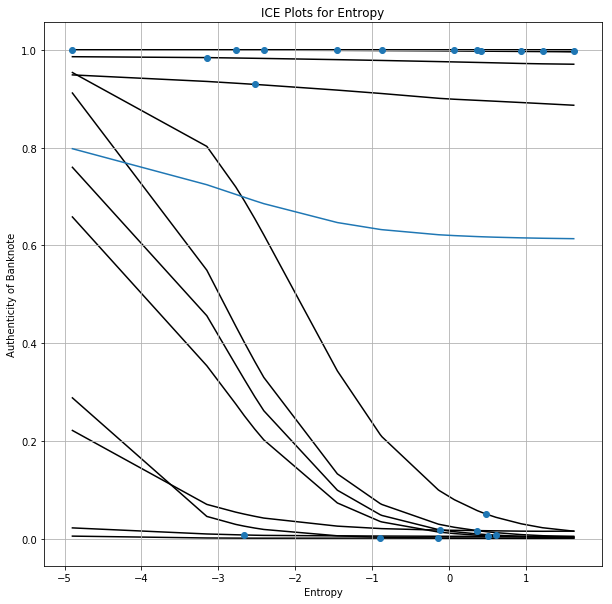

In [72]:
test_size=0.015
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(25,), alpha=0.001)
mlp.fit(X_train.values, y_train)
y_pred = mlp.predict(X_test.values)
y_prob = mlp.predict_proba(X_test)[:, 0]

print("Accuracy: %f" %(accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

df = X_train

features = list(range(len(df.columns)))
feature_names = df.columns
# for i in range(len(df.columns)):
#     plt.figure(i, figsize=(10, 10))
#     out = pdp_isolate(mlp, X, model_features=feature_names, feature=feature_names[i], n_jobs=cpu_count())
#     plot_params = {
#         'title':'Partial dependence plot (PDP) for %s' %(feature_names[i]),
#         'xlabel':'%s' %(feature_names[i]),
#         'ylabel':'Authenticity of Banknote'
#     }
#     pdp_plot(out, feature_names[i], figsize=(10, 10), ncols=1, plot_params=plot_params)
#     plt.savefig('../Plots/PDPPlotWhole{}.png'.format(feature_names[i]))
#     plt.savefig('../Plots/PDPPlotWhole{}.pdf'.format(feature_names[i]))
# for i in range(len(df.columns)):
#     plt.figure(i, figsize=(10, 10))
#     actual_plot(mlp, X_train)
def callable(X_test):
    return mlp.predict_proba(X_test)[:, 0]

for i in range(len(df.columns)):
    plt.figure(i, figsize=(10, 10))
    ax = plt.gca()
    ice_data = ice(X_test, feature_names[i], callable)
    ice_plot(ice_data=ice_data, c='k', plot_points=True,plot_pdp=True, cmap='RdBu', ax=ax)
    ax.grid()
    ax.set_xlabel('%s' % (feature_names[i]))
    ax.set_ylabel('Authenticity of Banknote')
    ax.set_title('ICE Plots for %s' %(feature_names[i]))
#     plt.savefig('../Plots/ICEPlot{}Centered.png'.format(feature_names[i]))
#     plt.savefig('../Plots/ICEPlot{}Centered.pdf'.format(feature_names[i]))

Curtosis
